## Credit card dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders.

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('creditcard.csv')

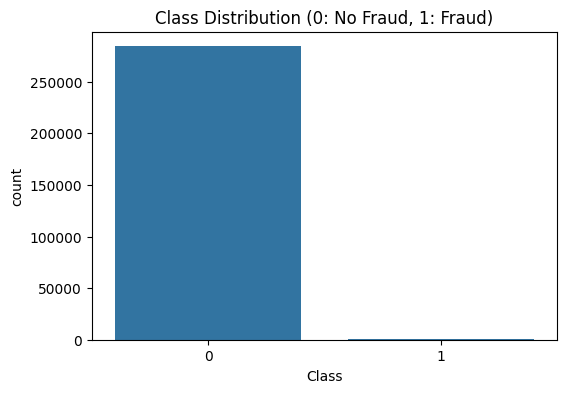

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [44]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

# Print class distribution in numbers
class_counts = df['Class'].value_counts()
print(f"Class Distribution:\n{class_counts}")

# Correlation Matrix


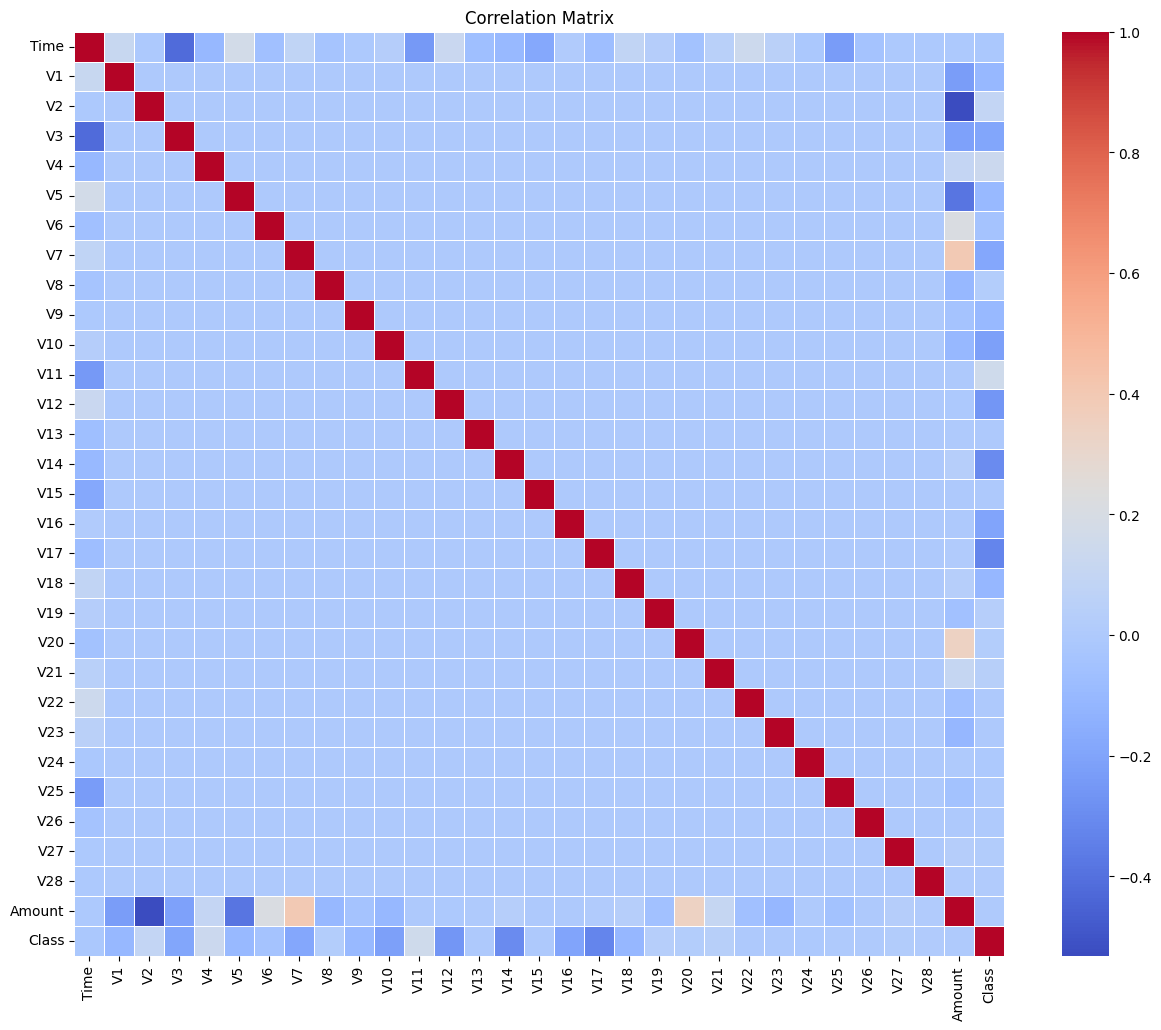

In [46]:
# Plot the correlation matrix
plt.figure(figsize=(15, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# This is unbalanced

In [12]:
# 0 -> Normal Transaction
# 1 -> fraudulent transaction
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Build a small sample of legit

In [16]:
legit_sample = legit.sample(n=492)

In [17]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57429,47907.0,-0.270902,1.614678,0.710386,4.221162,1.025022,0.293379,0.956537,-0.347384,-2.129498,...,0.148247,0.740656,0.143432,0.032185,-1.112431,0.136422,-0.047344,0.110831,3.98,0
91158,63335.0,1.377562,-1.014995,-0.129834,-1.951419,-0.472644,0.868123,-1.005950,0.277599,0.532098,...,-0.258619,-0.045332,-0.299731,-1.706067,0.749496,-0.376679,0.109129,0.002361,20.20,0
2797,2348.0,1.271319,0.357519,-0.052851,0.436751,0.318148,-0.096771,0.064142,-0.071878,-0.074273,...,-0.302466,-0.783863,0.041528,-0.778069,0.290891,0.172547,-0.000932,0.021328,2.69,0
17845,28970.0,0.927063,-1.523188,0.779074,-0.576354,-1.467410,0.531224,-1.132753,0.304559,-0.251573,...,0.471993,0.971505,-0.286640,-0.271310,0.304322,-0.031168,0.021683,0.040128,200.00,0
251967,155592.0,-0.204534,0.332677,-0.982268,-1.570228,3.032974,3.545487,0.096279,0.562117,0.869873,...,-0.329392,-0.588265,0.350788,0.562986,-1.391657,-0.103670,-0.312243,-0.192476,3.80,0


In [18]:
new_dataset['Class'].value_counts()
# we will have same number of fraud and legit

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
# Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

(984, 30) (787, 30) (197, 30)


# Random Forrest Model

In [48]:
# Build a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_prediction = rf.predict(X_test)

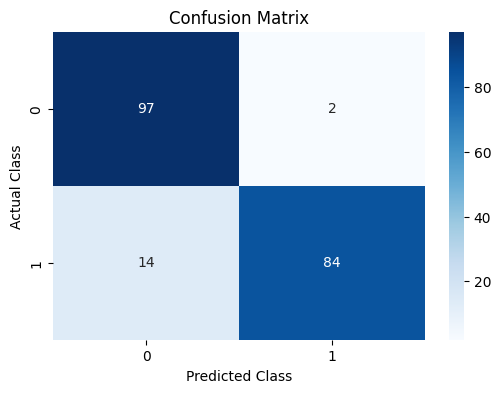

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [52]:
# Classification report
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.86      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



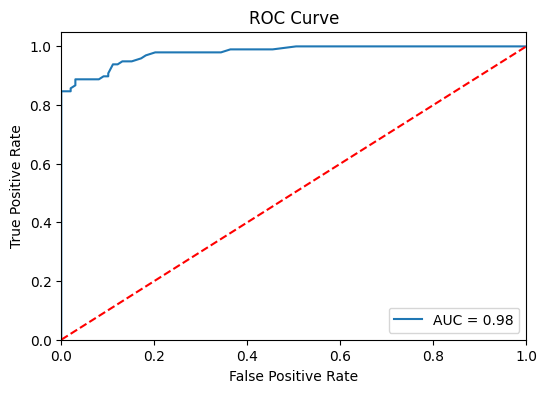

In [53]:
# ROC Curve and AUC
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance Visualization


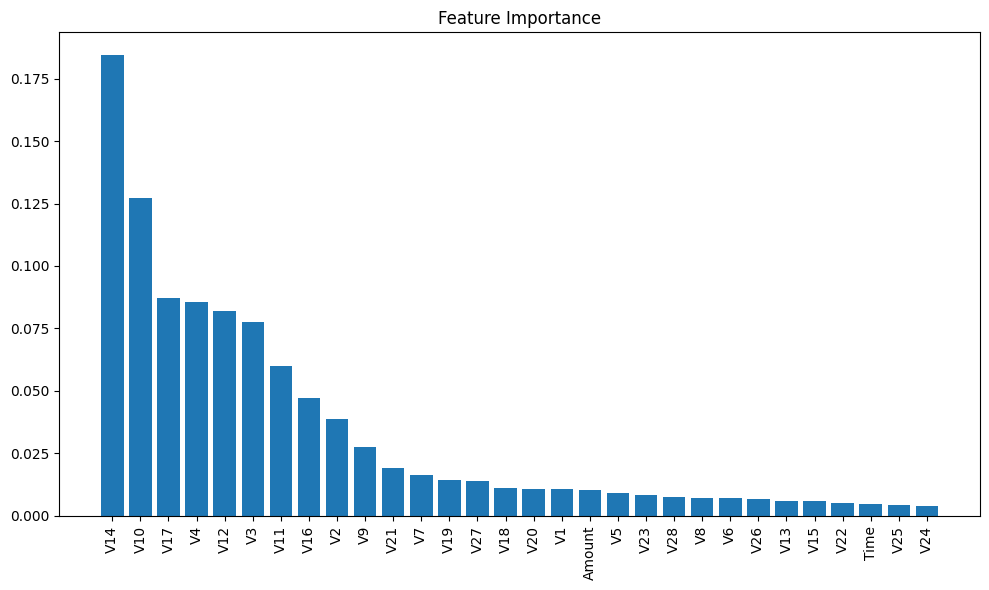

In [54]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Logistic Regression Model

In [23]:
model = LogisticRegression()

In [24]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

c:\Users\tanav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9364675984752223


In [33]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


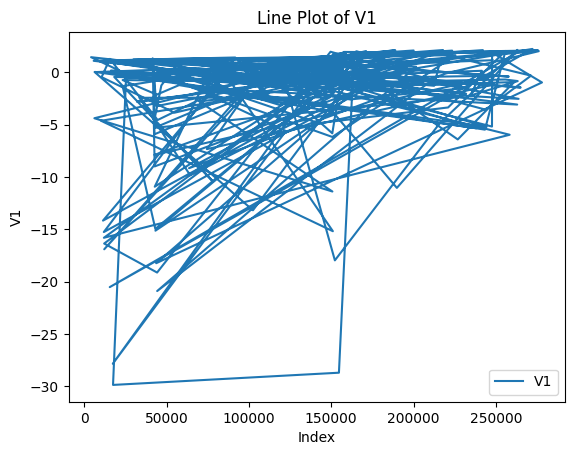

In [40]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
ax.plot(X_test.index, X_test['V1'], label='V1')

# Set the labels and title
ax.set_xlabel('Index')
ax.set_ylabel('V1')
ax.set_title('Line Plot of V1')

# Add a legend
ax.legend()

# Show the plot
plt.show()